In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


data = pd.read_csv('/content/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(data)

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[-0.38631524, -0.05515159],
       [-0.5679739 , -0.06144958],
       [ 0.2979762 ,  0.08474023],
       [ 0.46052216,  0.11460533],
       [-0.44134723, -0.16034683],
       [-0.42096717, -0.06126763],
       [ 0.57863184,  0.07164111],
       [ 0.14035181,  0.10637315],
       [-0.47575131,  0.13633551],
       [-0.57024335,  0.0206122 ]])

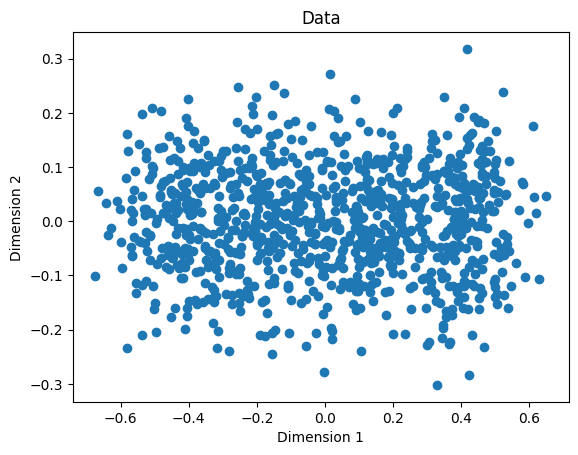

In [4]:
# Visualise the unclustered data points

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

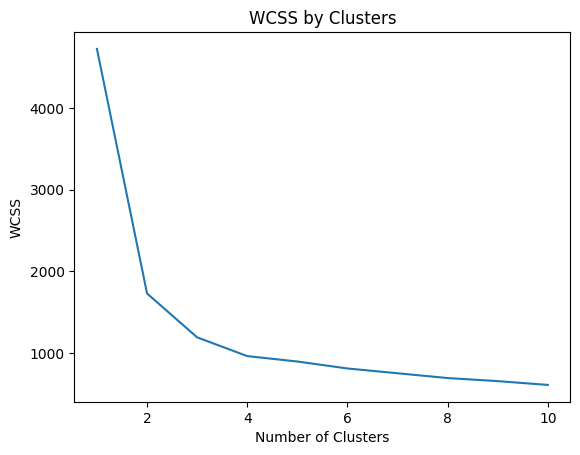

In [5]:
# Create 10 models with 1 to 10 clusters

wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i)
  # Fit the data points
  kmeans.fit(data)
  # Get the WCSS (inertia) value
  wcss.append(kmeans.inertia_)

# Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [6]:
# Create a model based on 4 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=500, max_iter=1500)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(data)
# View the cluster assignments
km_clusters

array([1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 2, 2, 0, 3, 2, 2, 1, 2,
       1, 1, 2, 3, 0, 1, 3, 2, 3, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 2, 2, 1, 3, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 0, 2, 3, 2, 0, 2, 0, 3, 2, 3, 0, 3, 2, 3, 0, 2, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 0, 1, 3, 3,
       3, 2, 3, 3, 2, 1, 2, 3, 1, 3, 3, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 3, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 3,
       3, 2, 2, 1, 2, 1, 3, 3, 2, 0, 1, 0, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 3, 1, 0, 2, 2, 0, 1, 0,
       2, 1, 3, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 0, 3, 0, 3,
       0, 2, 2, 3, 0, 1, 1, 2, 0, 2, 3, 3, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 2, 3, 3, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 0, 0, 0, 2, 2, 3, 1, 0,

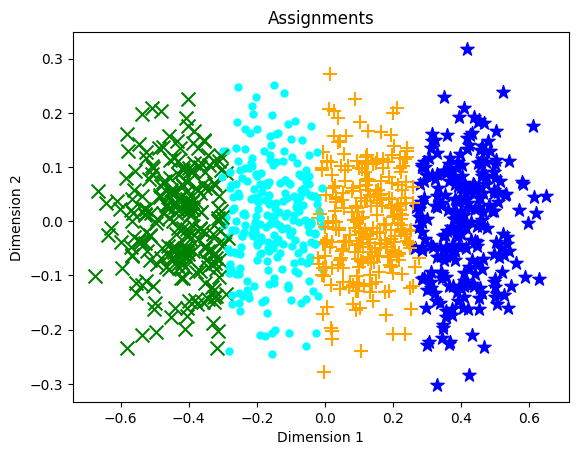

In [7]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [8]:
# Add the cluster assignments to the original DataFrame
data['Cluster'] = km_clusters

# Group by cluster and calculate the mean of each feature
cluster_means = data.groupby('Cluster').mean()

# Display the results
display(cluster_means)

,A,B,C
Cluster,,,
0,2.985624,2.995927,2.987570
1,-0.039730,-0.016021,-0.091599
2,1.947296,1.977630,1.958257
3,0.962861,0.930112,0.938095


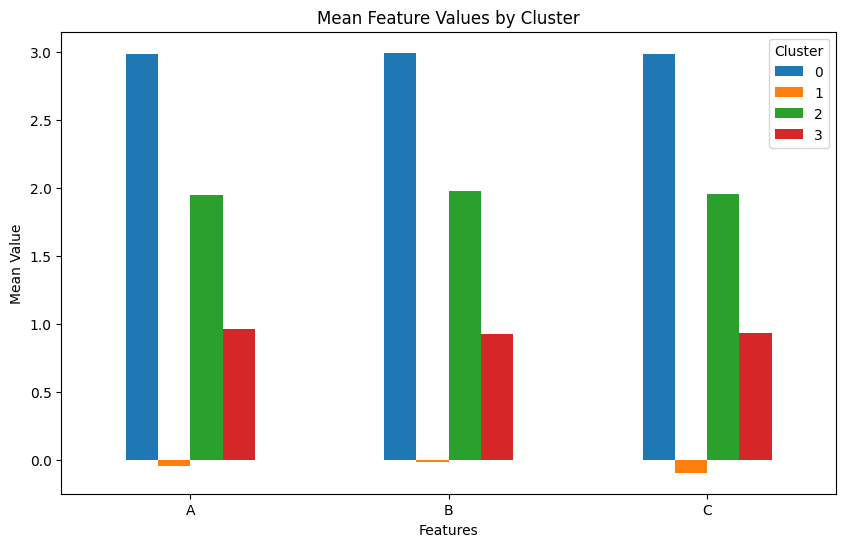

In [9]:
# Transpose the cluster_means DataFrame for easier plotting
cluster_means_T = cluster_means.T

# Create a bar plot
cluster_means_T.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Feature Values by Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Cluster')
plt.show()